<a href="https://colab.research.google.com/github/tnc-br/ddf_common/blob/dashboarding/dashboarding.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [12]:
%pip install --upgrade google-cloud-bigquery

In [37]:
# This stub (ddfimport) allows the Ddf EE API to be imported.
import sys
import pandas as pd
!if [ ! -d "/content/ddf_common_stub" ] ; then git clone -b test https://github.com/tnc-br/ddf_common_stub.git; fi
sys.path.append("/content/ddf_common_stub/")
import ddfimport
ddfimport.ddf_import_common()

executing checkout_branch ...
Branch main already checked out.
Remember to reload your imports with `importlib.reload(module)`.
b''
main branch checked out as readonly. You may now use ddf_common imports


In [14]:
import importlib
import eeddf
import bqddf
importlib.reload(eeddf)
importlib.reload(bqddf)

# Use your credentials to access the BQ tables.
eeddf.initialize_ddf(test_environment = True)

In [15]:
def get_all_training_results():
  client = bqddf._get_big_query_client()

  # Set up SQL query
  table_name = f"{bqddf._CONFIG['DATASET']}.{bqddf._CONFIG['FLATTENED_TABLE']}"
  query = f"SELECT * FROM {table_name}"

  # Execute the query
  results = client.query_and_wait(query)
  return results

results = get_all_training_results()

In [16]:
# Results is iterator based, so you will get an error running this twice!
df = results.to_dataframe()

In [17]:
df.head()

,training_id,num_epochs,num_layers,num_nodes_per_layer,training_batch_size,learning_rate,dropout_rate,activation_func,early_stopping_patience,double_sided_kl,...,mean_rmse,var_rmse,overall_rmse,dataset_id,completion_timestamp,radius_pace,per_radius_eval,tags,as_json,trusted_buffer_radius
0,test-rkrige-2025-01-31-2,-1,-1,-1,-1,-1.00000,-1.0,,-1,False,...,1.923385,1.253441,1.588413,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-03-14 16:22:24.897040+00:00,100,"[{'radius': 6, 'auc': 0.5499226375117593, 'p_v...","[author:npr, regression_kriging, all_standardi...","{""activation_func"":"""",""double_sided_kl"":false,...",5
1,test-rkrige-2025-01-31-2,-1,-1,-1,-1,-1.00000,-1.0,,-1,False,...,1.923385,1.253441,1.588413,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-03-14 16:43:15.137370+00:00,100,"[{'radius': 6, 'auc': 0.5306714602171038, 'p_v...","[author:npr, regression_kriging, all_standardi...","{""activation_func"":"""",""double_sided_kl"":false,...",5
2,cv3-test-4,5000,2,20,8,0.00001,0.0,relu,100,False,...,1.475324,1.074420,1.274872,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-04-04 20:09:14.656231+00:00,100,"[{'radius': 6, 'auc': 0.46058722929579676, 'p_...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5
3,cv3-test-3,5000,2,20,8,0.00001,0.0,relu,100,False,...,1.475324,1.074420,1.274872,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-04-04 19:51:43.483638+00:00,100,"[{'radius': 6, 'auc': 0.46058722929579676, 'p_...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5
4,test-2025-01-18-cv2-test-erickzul,1000,2,20,8,0.00010,0.0,relu,100,False,...,1.446195,2.116459,1.781327,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-28 16:16:47.436258+00:00,100,"[{'radius': 6, 'auc': 0.4367088058965503, 'p_v...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5


In [32]:
# @title Experiments by a particular author sorted by timestamp

AUTHOR = 'ruru'  #@param {type: "string"}
AUTHOR_PREFIX = "author:"

In [33]:
# Function to safely extract author name
def get_author_if_valid(tags_list):
  if len(tags_list) > 0:
    first_tag = tags_list[0]
    if AUTHOR_PREFIX in first_tag:
      potential_author = first_tag.split(':', 1)[1]
      if potential_author:
        return potential_author
  return None

In [34]:
df['extracted_author'] = df['tags'].apply(get_author_if_valid)

In [ ]:
specific_author_df = df[df['extracted_author'] == AUTHOR].copy() # .copy() to avoid SettingWithCopyWarning

In [ ]:
specific_author_df.sort_values(by='completion_timestamp', inplace=True)

In [ ]:
specific_author_df

,training_id,num_epochs,num_layers,num_nodes_per_layer,training_batch_size,learning_rate,dropout_rate,activation_func,early_stopping_patience,double_sided_kl,...,var_rmse,overall_rmse,dataset_id,completion_timestamp,radius_pace,per_radius_eval,tags,as_json,trusted_buffer_radius,extracted_author
120,test-2025-01-18-cv2-test,1000,2,20,8,0.00010,0.0,relu,100,False,...,1.130919,1.631735,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-01-24 17:40:50.315733+00:00,100,"[{'radius': 6, 'auc': 0.529490162594798, 'p_va...","[author:ruru, ViNN, test, new_tag, new_tag, ne...","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
118,test-2025-01-18-cv2-test,1000,2,20,8,0.00010,0.0,relu,100,False,...,1.130919,1.631735,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-01-24 17:44:14.831316+00:00,100,"[{'radius': 6, 'auc': 0.5065504122944507, 'p_v...","[author:ruru, ViNN, test, new_tag, new_tag, ne...","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
121,ruru-w-carbon,2000,2,20,8,0.00100,0.0,relu,200,False,...,6.362523,4.663733,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-14 16:59:48.416696+00:00,100,"[{'radius': 6, 'auc': 0.5237419393717669, 'p_v...","[author:ruru, ViNN, Carbon-test]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
124,ruru-w-carbon-3layers,2000,3,12,3,0.00050,0.0,relu,200,False,...,2.063757,2.557515,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-14 17:03:33.548258+00:00,100,"[{'radius': 6, 'auc': 0.5149439751923366, 'p_v...","[author:ruru, ViNN, Carbon-test]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
122,ruru-w-carbon-2layers,2000,2,10,12,0.00050,0.0,relu,200,False,...,2.278469,2.191581,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-14 17:46:15.520978+00:00,100,"[{'radius': 6, 'auc': 0.49487456388701695, 'p_...","[author:ruru, ViNN, Carbon-test]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
123,ruru-w-carbon-2layers-1b,2000,2,20,1,0.00050,0.0,relu,200,False,...,4.375263,2.755721,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-14 18:05:52.325815+00:00,100,"[{'radius': 6, 'auc': 0.4906411670633953, 'p_v...","[author:ruru, ViNN, Carbon-test]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
4,test-2025-01-18-cv2-test-erickzul,1000,2,20,8,0.00010,0.0,relu,100,False,...,2.116459,1.781327,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-28 16:16:47.436258+00:00,100,"[{'radius': 6, 'auc': 0.4367088058965503, 'p_v...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
5,test-2025-01-18-cv2-test-erickzul-2,1000,2,20,8,0.00010,0.0,relu,100,False,...,1.203989,1.613528,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-02-28 19:22:14.901177+00:00,100,"[{'radius': 6, 'auc': 0.5075010366767363, 'p_v...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
6,cv3-test,1000,2,20,8,0.00010,0.0,relu,100,False,...,1.859029,1.708542,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-04-04 15:50:45.135274+00:00,100,"[{'radius': 6, 'auc': 0.4904906624111679, 'p_v...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru
3,cv3-test-3,5000,2,20,8,0.00001,0.0,relu,100,False,...,1.074420,1.274872,/content/gdrive/MyDrive/amazon_rainforest_file...,2025-04-04 19:51:43.483638+00:00,100,"[{'radius': 6, 'auc': 0.46058722929579676, 'p_...","[author:ruru, ViNN]","{""activation_func"":""relu"",""double_sided_kl"":fa...",5,ruru


In [ ]:
# @title Compares experiments PR curves by a particular radius
RADIUS = 6  #@param {type: "integer"}
TRAINING_ID_1 = 'test-2025-01-18-cv2-test' #@param {type: "string"}
TRAINING_ID_2 = 'test-2024-09-28' #@param {type: "string"}

In [ ]:
def get_coordinates_for_a_radius (training_id, radius_required):
  for _,row in specific_author_df.iterrows():
    if row['training_id'] != training_id:
      continue
    for per_radius_metrics in row['per_radius_eval']:
      if 'radius' in per_radius_metrics and per_radius_metrics['radius'] == radius_required:
        return (per_radius_metrics['pr_curve'][0]['precision'], per_radius_metrics['pr_curve'][0]['recall'])
  return (None, None)

In [ ]:
y_points = get_coordinates_for_a_radius(TRAINING_ID_1, RADIUS)[0]
x_points = get_coordinates_for_a_radius(TRAINING_ID_1, RADIUS)[1]
y_points_2 = get_coordinates_for_a_radius(TRAINING_ID_2, RADIUS)[0]
x_points_2 = get_coordinates_for_a_radius(TRAINING_ID_2, RADIUS)[1]

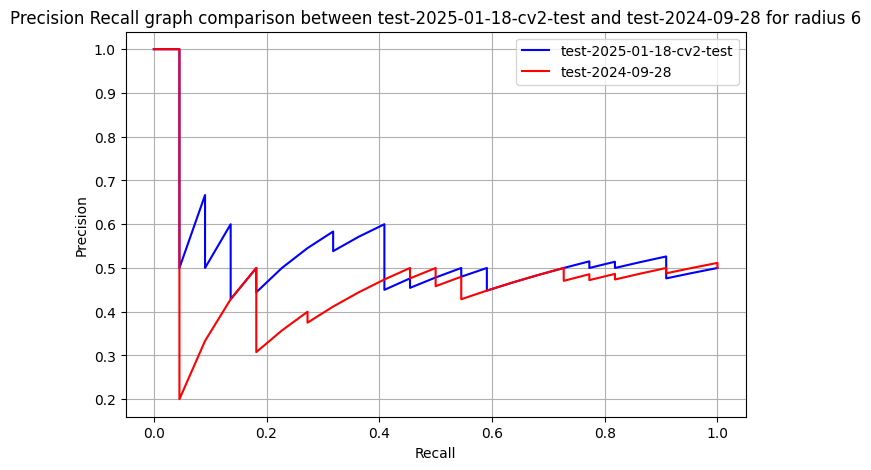

In [ ]:
plt.figure(figsize=(8, 5))

plt.plot(x_points, y_points, label=TRAINING_ID_1, color='blue')
plt.plot(x_points_2, y_points_2, label=TRAINING_ID_2, color='red')

plt.title("Precision Recall graph comparison between "+str(TRAINING_ID_1)+ " and "+ str(TRAINING_ID_2)+" for radius "+str(RADIUS))      # Add a title to the plot
plt.xlabel("Recall")        # Label the X-axis
plt.ylabel("Precision")        # Label the Y-axis
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# @title All curves for an Experiment for all radii

TRAINING_ID = 'test-2025-01-18-cv2-test'  #@param {type: "string"}

In [ ]:
y_points = get_coordinates_for_a_radius(TRAINING_ID, RADIUS)[0]
x_points = get_coordinates_for_a_radius(TRAINING_ID, RADIUS)[1]

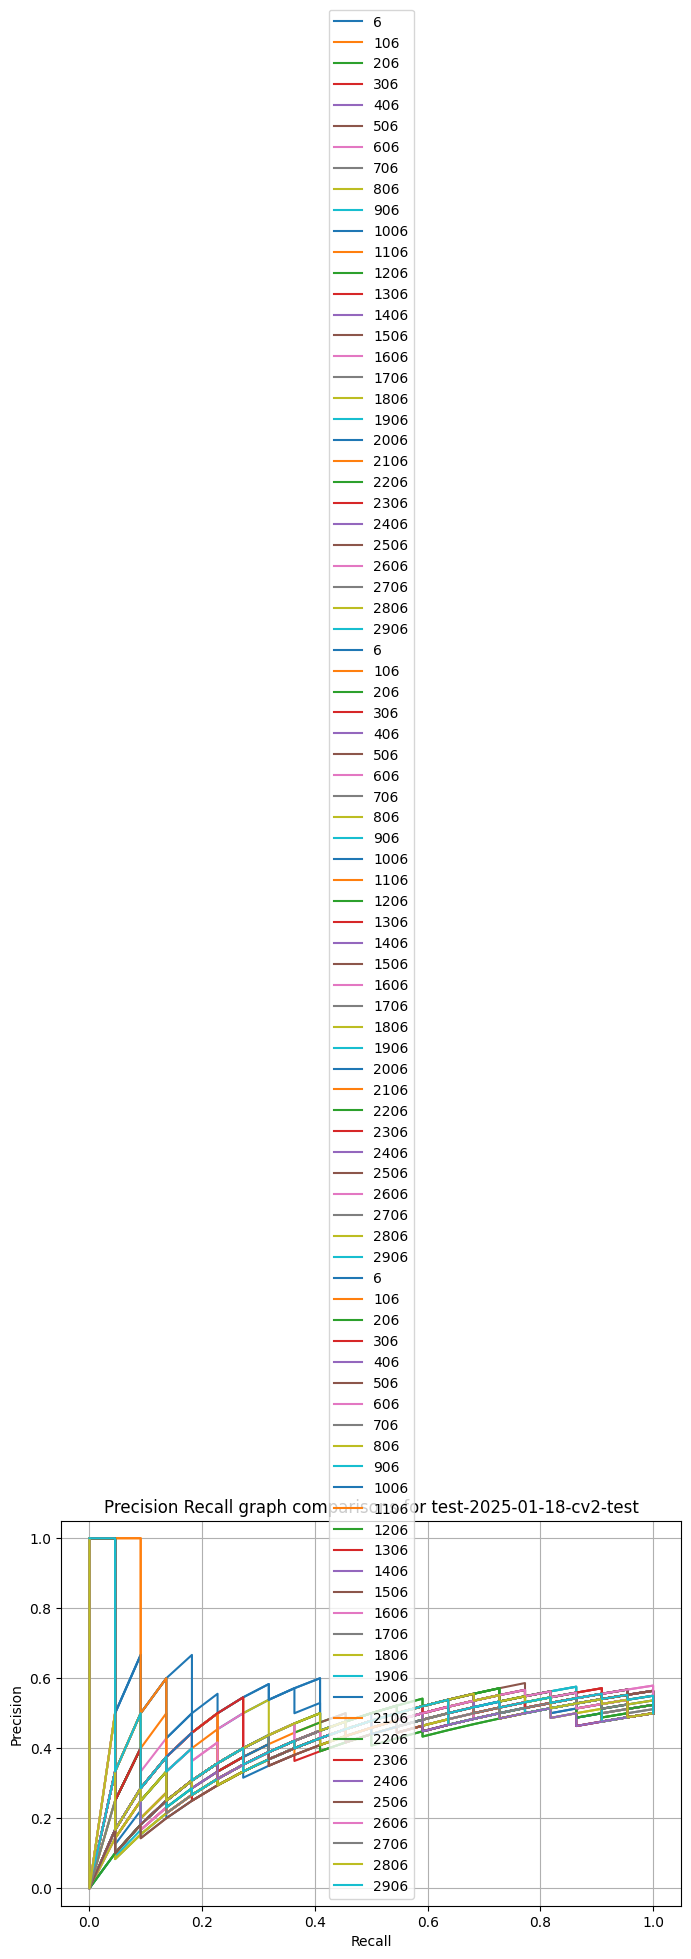

In [ ]:
filtered_df = df[df['training_id'] == TRAINING_ID]
plt.figure(figsize=(8, 5))

for _, row in filtered_df.iterrows():
  for per_radius_metrics in row['per_radius_eval']:
      prec = per_radius_metrics['pr_curve'][0]['precision']
      recall = per_radius_metrics['pr_curve'][0]['recall']
      plt.plot(recall, prec, label=per_radius_metrics['radius'])


plt.title("Precision Recall graph comparisons for " + str(TRAINING_ID))
plt.xlabel("Recall")        # Label the X-axis
plt.ylabel("Precision")        # Label the Y-axis
plt.grid(True)
plt.legend()
plt.show()

In [ ]:
# @title Get all time leaderboard for AUC

In [38]:
# Author, experiment id, radius and AUC, sorted by AUC top to bottom

def get_auc_leaderboard(df):
  flattened_data = []
  for _, row in df.iterrows():
    # Loop through the list of dictionaries in the 'per_radius_eval' column
    for eval_data in row['per_radius_eval']:
      flattened_data.append({
          'Author': row['extracted_author'],
          'Experiment ID': row['training_id'],
          'Radius': eval_data['radius'],
          'AUC': eval_data['auc']
      })

  # 3. Create a new DataFrame and sort it
  results_df = pd.DataFrame(flattened_data)
  sorted_df = results_df.sort_values(by='AUC', ascending=False, ignore_index=True)

  # 4. Print the final, sorted result
  print(sorted_df)
  return sorted_df

In [39]:
auc_leaderboard_df = get_auc_leaderboard(df)

     Author                        Experiment ID  Radius       AUC
0      ruru                      test-2024-11-15    1906  0.992087
1      ruru                      test-2024-09-13    2406  0.990098
2      ruru                      test-2024-09-13    2606  0.989869
3      ruru  test-2025-01-18-cv2-test-erickzul-2    2606  0.988854
4      ruru                      test-2024-11-15    1106  0.987378
...     ...                                  ...     ...       ...
2725   ruru                        ruru-w-carbon     306  0.350751
2726   ruru                        ruru-w-carbon     606  0.350505
2727   ruru              test-2025-01-10-cv-test     706  0.345161
2728   ruru                        ruru-w-carbon     706  0.344680
2729   ruru              test-2025-01-10-cv-test     606  0.336206

[2730 rows x 4 columns]
